In [3]:
library(tidyverse)
library(plotly)
library(janitor)
library(arrow)
library(showtext)
library(geomtextpath)

In [4]:
setwd('c:/Users/Christian/code_projects/apple-heart-rate')

In [22]:
sleep <- read_feather("data/inferred_sleep.feather")
heart_rate <- read_feather('data/heart_rate.feather')
resting_heart <- read_feather('data/resting_heart.feather')

In [7]:
showtext_auto()
font_add_google('Reem Kufi')
theme_set(
  theme_minimal(base_family = "Reem Kufi", base_size = 12) +
    theme(
      plot.title = element_text(
        size = 15,
        face = "bold"
      ),
      plot.caption = element_text(
        size = 9,
        color = "#ffffff"
      ),
      plot.background = element_rect(fill = "#ffffff", color = NA),
      panel.background = element_rect(fill = NA, color = NA),
      legend.position = "right",
      legend.text = element_text(size = 9, color = "grey40"),
      legend.background = element_rect(
        color = "#949494", 
        linewidth = .3, 
        fill = "#ffffff"
      )
    )
)




Warning message:
"Removed 59 rows containing missing values or values outside the scale range
(`geom_line()`)."


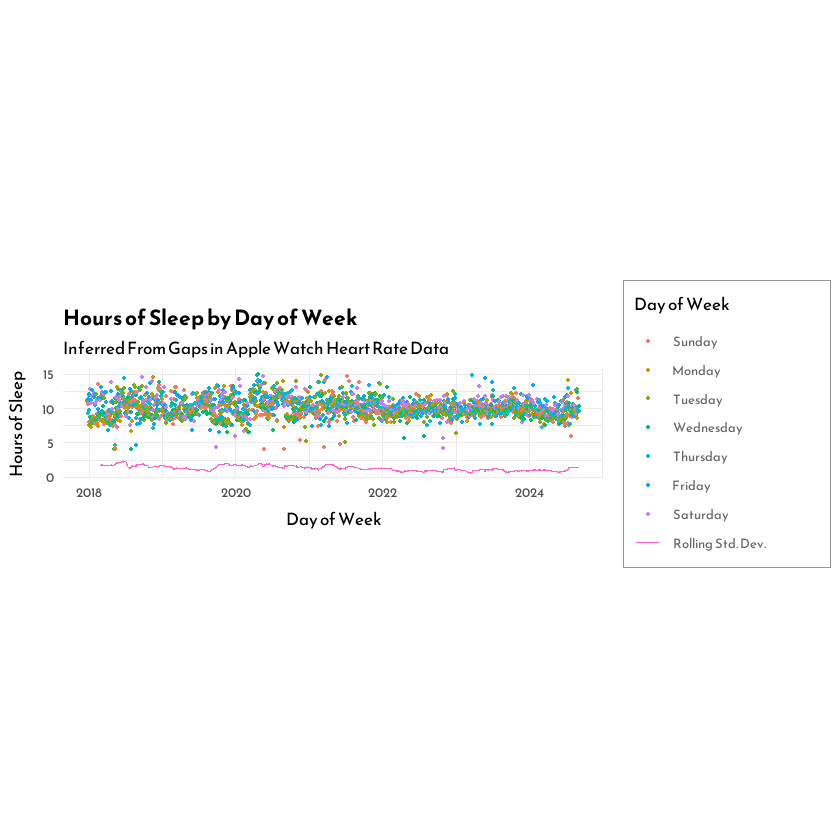

In [76]:
fig <- ggplot(sleep, mapping = aes(x = sleep_date, y = hours_of_sleep)) +
geom_point(mapping = aes(color = day_of_week), size = 0.8) +
geom_line(mapping = aes(y = std_dev, color = 'Rolling Std. Dev.')) +
#scale_color_brewer(palette = 'Set2') + 
scale_y_continuous(breaks = seq(0, 15, 5)) +
scale_color_discrete(limits = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Rolling Std. Dev.")) +
labs(
  title = "Hours of Sleep by Day of Week", 
  subtitle = 'Inferred From Gaps in Apple Watch Heart Rate Data',
  x = 'Day of Week', 
  y = 'Hours of Sleep',
  color = 'Day of Week',
  )  +
  theme(aspect.ratio = 1/5)


fig

In [77]:
showtext_opts(dpi = 300)
ggsave(fig, filename = "plots/all_sleep.png", dpi = 600, device = 'png', width = 12, height = 4, units = 'in')
showtext_opts(dpi = 100)

Warning message:
"Removed 59 rows containing missing values or values outside the scale range
(`geom_line()`)."


### Sleep Violin

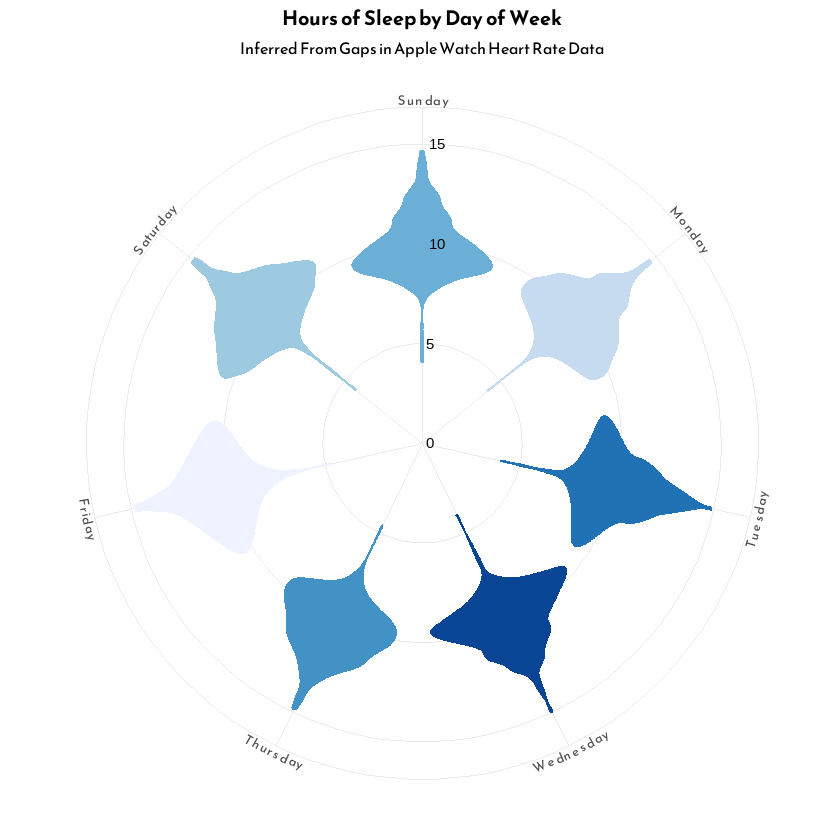

In [32]:
sleep_by_day_violin <- ggplot(sleep, mapping = aes(x = day_of_week, y = hours_of_sleep)) +
geom_violin(mapping = aes(fill = day_of_week, color = day_of_week), size = 0.8) +
scale_fill_brewer(palette = 'Blues') +
scale_color_brewer(palette = 'Blues') +
scale_x_discrete(limits = c("Thursday", "Friday", "Saturday","Sunday", "Monday", "Tuesday", "Wednesday")) + 
labs(
  title = "Hours of Sleep by Day of Week", 
  subtitle = 'Inferred From Gaps in Apple Watch Heart Rate Data',
  x = 'Day of Week', 
  y = 'Hours of Sleep',
  fill = 'Day of Week',
  color = 'Day of Week',
  ) +
  coord_curvedpolar(start = 180*pi/180) +
  theme(legend.position = "none", 
  axis.text.y = element_blank(),
  axis.title.y = element_blank(),
  axis.title.x = element_blank(),
  plot.title = element_text(hjust = 0.5),
  plot.subtitle = element_text(hjust = 0.5)) +
  #there simply must be a better way
  annotate("text", x = 4, y = 0, label = "0", hjust = -0.5) + 
  annotate("text", x = 4, y = 5, label = "5", hjust = -0.5) +  
  annotate("text", x = 4, y = 10, label = "10", hjust = -0.5) + 
  annotate("text", x = 4, y = 15, label = "15", hjust = -0.5) 
sleep_by_day_violin

In [79]:
showtext_opts(dpi = 300)
ggsave(sleep_by_day_violin, filename = "plots/sleep_by_day.png", dpi = 600, device = 'png', width = 4, height = 4, units = 'in')
showtext_opts(dpi = 100)

### Heart Rate Violin

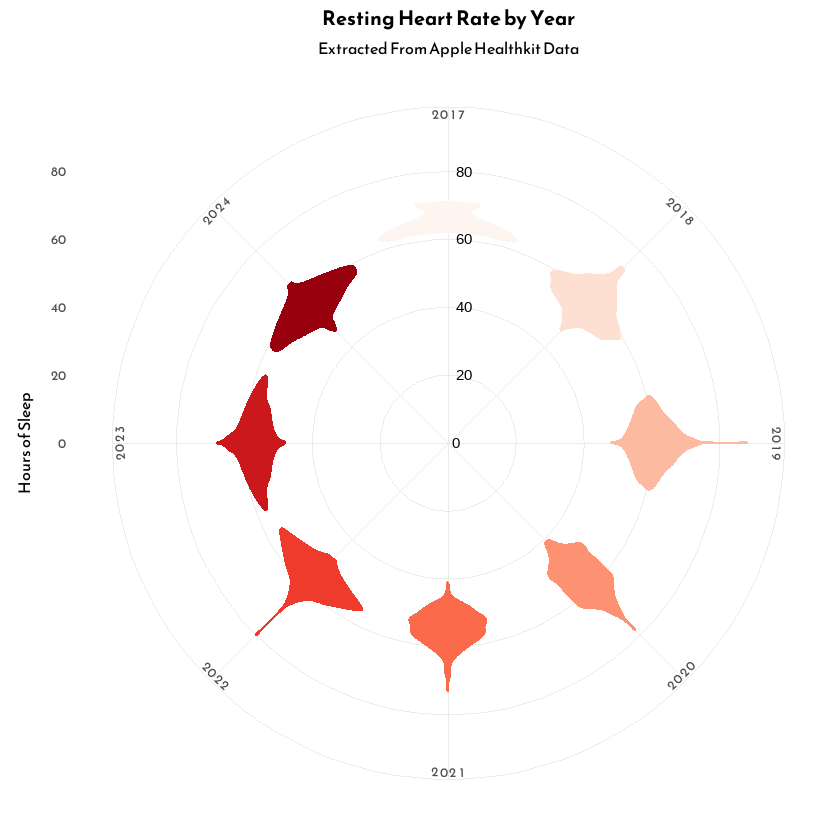

In [46]:
heart_by_year_fig <- ggplot(resting_heart, mapping = aes(x = factor(year), y = value)) +
geom_violin(mapping = aes(fill = factor(year), color = factor(year)), size = 0.8) +
scale_fill_brewer(palette = 'Reds') +
scale_color_brewer(palette = 'Reds') +
#scale_x_discrete(limits = c("Thursday", "Friday", "Saturday","Sunday", "Monday", "Tuesday", "Wednesday")) + 
labs(
  title = "Resting Heart Rate by Year", 
  subtitle = 'Extracted From Apple Healthkit Data',
  x = 'Day of Week', 
  y = 'Hours of Sleep',
  fill = 'Day of Week',
  color = 'Day of Week',
  ) +
  coord_curvedpolar(start = (360-22.5)*pi/180) +
  theme(legend.position = "none", 
  #axis.text.y = element_blank(),
  #axis.title.y = element_blank(),
  axis.title.x = element_blank(),
  plot.title = element_text(hjust = 0.5),
  plot.subtitle = element_text(hjust = 0.5)) +
  #there simply must be a better way
  annotate("text", x = 1, y = 0, label = "0", hjust = -0.5) + 
  annotate("text", x = 1, y = 20, label = "20", hjust = -0.5) + 
  annotate("text", x = 1, y = 40, label = "40", hjust = -0.5) +  
  annotate("text", x = 1, y = 60, label = "60", hjust = -0.5) + 
  annotate("text", x = 1, y = 80, label = "80", hjust = -0.5) 
heart_by_year_fig

In [80]:
showtext_opts(dpi = 300)
ggsave(heart_by_year_fig, filename = "plots/resting_hr_by_year.png", dpi = 600, device = 'png', width = 4, height = 4, units = 'in')
showtext_opts(dpi = 100)